### DEMAPP05

# Chebychev polynomial and spline approximantion of various functions

Demonstrates Chebychev polynomial, cubic spline, and linear spline approximation for the following functions
\begin{align}
    y &= 1 + x + 2x^2 - 3x^3 \\
    y &= \exp(-x) \\
    y &= \frac{1}{1+25x^2} \\
    y &= \sqrt{|x|} 
\end{align}

In [1]:
from demos.setup import np, plt
from compecon import BasisChebyshev, BasisSpline, nodeunif
%matplotlib inline

### Functions to be approximated

In [2]:
funcs = [lambda x: 1 + x + 2 * x ** 2 - 3 * x ** 3,
         lambda x: np.exp(-x),
         lambda x: 1 / ( 1 + 25 * x ** 2),
         lambda x: np.sqrt(np.abs(x))]

fst = ['$y = 1 + x + 2x^2 - 3x^3$', '$y = \exp(-x)$', 
       '$y = 1/(1+25x^2)$', '$y = \sqrt{|x|}$']

Set degree of approximation and endpoints of approximation interval

In [3]:
n = 7   # degree of approximation
a = -1  # left endpoint
b = 1   # right endpoint

Construct uniform grid for error ploting

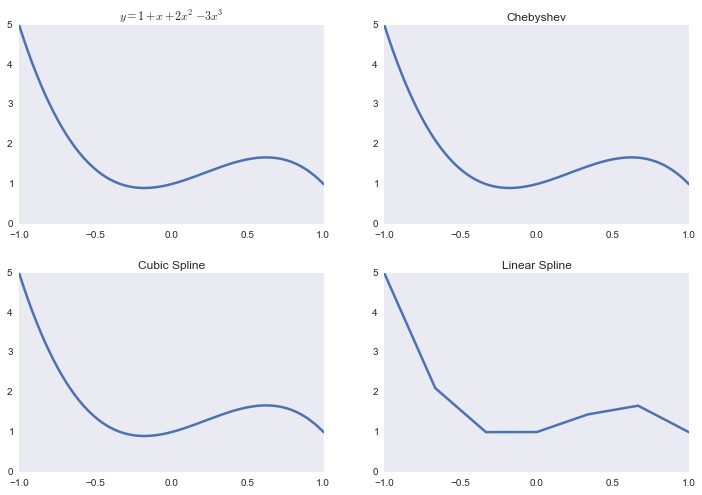

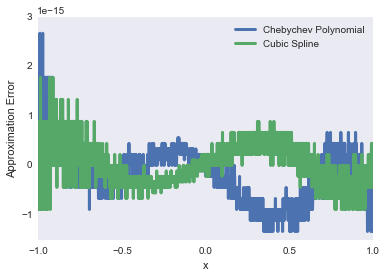

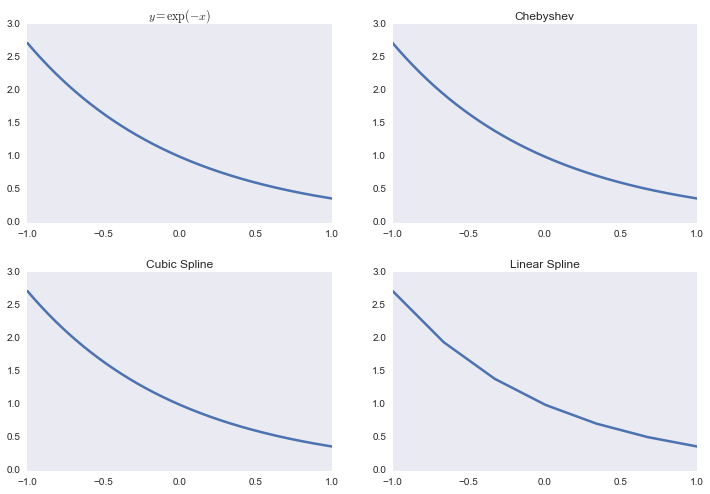

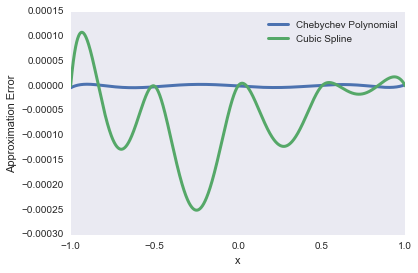

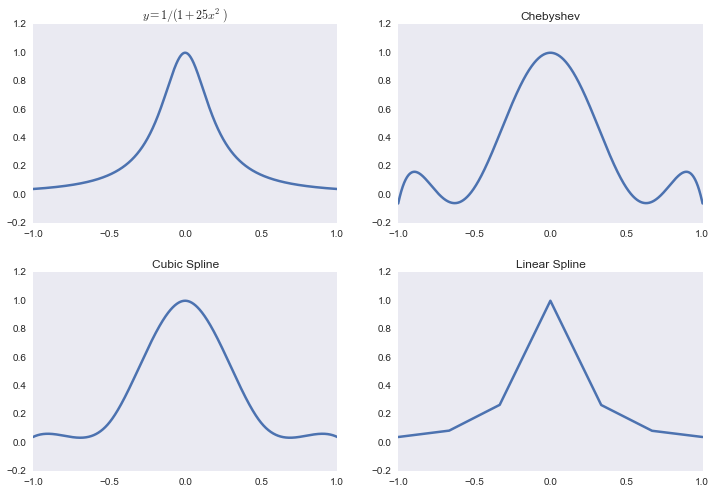

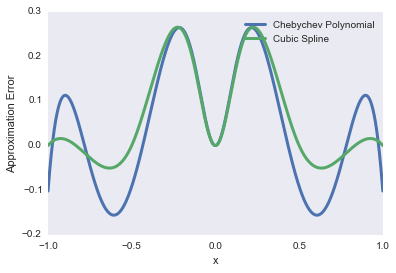

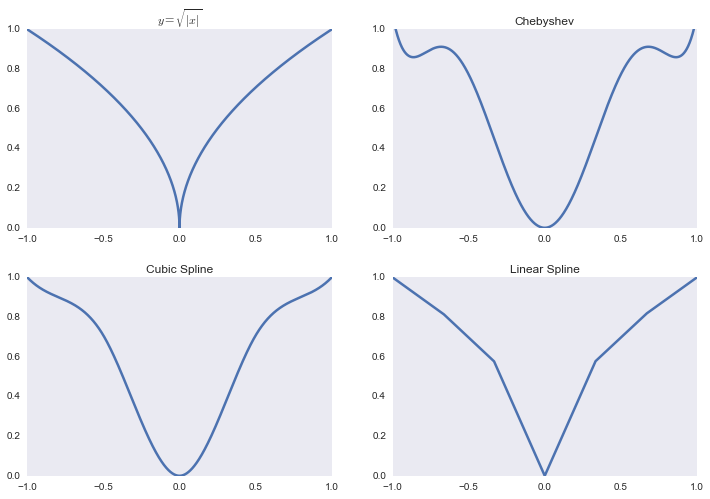

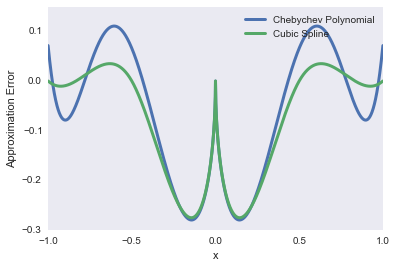

In [4]:
x = nodeunif(2001, a, b)

def subfig(k, x, y, xlim, ylim, title):
    plt.subplot(2, 2, k)
    plt.plot(x, y)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)

for ifunc, ff in enumerate(funcs):

    # Construct interpolants
    C = BasisChebyshev(n, a, b, f=ff)
    S = BasisSpline(n, a, b, f=ff)
    L = BasisSpline(n, a, b, k=1, f=ff)

    # Compute actual and fitted values on grid
    y = ff(x)  # actual
    yc = C(x)  # Chebychev approximant
    ys = S(x)  # cubic spline approximant
    yl = L(x)  # linear spline approximant

    
    # Plot function approximations
    plt.figure(figsize=[12,8])
    ymin = np.floor(y.min())
    ymax = np.ceil(y.max())
    xlim = [a, b]
    ylim = [-0.2, 1.2] if ifunc==2 else [ymin, ymax]

    subfig(1, x, y, xlim, ylim, fst[ifunc])
    subfig(2, x, yc, xlim, ylim, 'Chebyshev')
    subfig(3, x, ys, xlim, ylim, 'Cubic Spline')
    subfig(4, x, yl, xlim, ylim, 'Linear Spline')

    # Plot function approximation error
    plt.figure()
    plt.plot(x, np.c_[yc - y, ys - y], linewidth=3)
    plt.xlabel('x')
    plt.ylabel('Approximation Error')
    plt.legend(['Chebychev Polynomial','Cubic Spline'])
    # pltlegend('boxoff')